## Predictive Modeling and Estimation of Housing Prices

* This script 'house_price_estimator.py' contain code sections for performing various regressions (Linear, Lasso, Ridge, Decision Tree, Gradient Boosting, Random Forest, K Nearest Neighbor, and Support Vector Regression) sequentially to predict residential property prices.

* For performance analysis, Mean Square Error (MSE) and R2 Score metrics have been calculated. The regressors exhibit varying performance based on the dataset. Therefore, the selection of the regressor is dependent on the specific task. Notably, our findings suggest that linear regressors (linear, lasso, ridge) did not perform well with our data and Random Forest regressor was the best among all.

* Access the data from the 'Dataset' folder if it's not already available. Ensure the execution of the necessary cells each time you restart the notebook.

* Occasional notebook restarts might be necessary. In such cases, remember to re-execute the cells containing completed code, starting from the top, before proceeding.The provided cells ensure the proper setup of your environment for seamless execution.

In [1]:
#Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=faa78c4b64145012b48e1bcca72c15fed5692c5976da0eb8331297771fdeec0b
  Stored in directory: /Users/pujasaha/Library/Caches/pip/wheels/df/5c/39/36f8dae25a1e88d6ec4411dec4a143781e64fdff6897758eec
Successfully built Panda


Important! After you have ran pip install, please restart the kernel using the **Kernel** menu 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Loading, Splitting and Scaling

In [43]:
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

#loading dataset
data = pd.read_csv('Dataset/Processed_Data/numerical_dataset.csv')
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [65]:
# Initializing model
linear_reg = LinearRegression()

# Defining hyperparameters (Linear Regression doesn't have hyperparameters to tune like Lasso or Ridge)
param_grid = {}  # Empty dictionary as Linear Regression doesn't have specific hyperparameters

# Performing GridSearchCV (Not for hyperparameter tuning, but for consistency)
grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fitting the model on the entire training data
grid_search.fit(X_train, y_train)

# Using the best model obtained directly (as Linear Regression doesn't have hyperparameters to tune)
best_linear_reg = grid_search.best_estimator_
best_linear_reg.fit(X_train, y_train)

# Predicting on the test set using the final model
y_pred = best_linear_reg.predict(X_test)

# Calculating RMSE (Root Mean Squared Error) on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean Squared Error: 2.568985421986381e+24
R-squared (R2) Score: -5.059159498375018e+26


## Lasso Regression

In [45]:
#initializing model
lasso_reg = Lasso()

#defining hyperparameters 
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

#performing GridSearchCV to tune hyperparameter
grid_search = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_lasso_reg = Lasso(**best_params)
best_lasso_reg.fit(X_train, y_train)

#predicting on the test set using the final model
y_pred = best_lasso_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = (mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mean Squared Error: 0.005102244499532466
R-squared (R2) Score: -0.004796232081468288


## Ridge Regression

In [46]:
#initializing model
ridge_reg = Ridge()

#defining hyperparameters for tuning
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

#performing GridSearchCV to tune hyperparameter
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_ridge_reg = Ridge(**best_params)
best_ridge_reg.fit(X_train, y_train)

#predict on the test set using the final model
y_pred = best_ridge_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = (mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Root Mean Squared Error: 0.005955998468935676
R-squared (R2) Score: -0.17292787917512475


## Decision Tree Regression 

In [47]:
#initializing model 
tree_reg = DecisionTreeRegressor()

#defining hyperparameters for tuning
param_grid = {
    'max_depth': [3, 5, 7, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

#performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_tree_reg = DecisionTreeRegressor(**best_params)
best_tree_reg.fit(X_train, y_train)

#predicting on the test set using the final model
y_pred = best_tree_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mean Squared Error: 0.0014824870845462689
R-squared (R2) Score: 0.7080505575932262


## Gradient Boosting Regression

In [23]:
#initializing model 
gb_reg = GradientBoostingRegressor()

#defining hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'learning_rate': [0.1, 0.05],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 4],  # Maximum depth of the individual trees
}

#performing GridSearchCV for tuning hyperparameter 
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data with tuned hyperparameter 
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_gb_reg = GradientBoostingRegressor(**best_params)
best_gb_reg.fit(X_train, y_train)

#### predicting on the test set using the final model
y_pred = best_gb_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = (mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mean Squared Error: 0.0015780175041898582
R-squared (R2) Score: 0.6892375419261338


## Random Forest Regression

In [51]:
#initializing model 
forest_reg = RandomForestRegressor()

#defining hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

#performing GridSearchCV to tune hyperparameter 
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data 
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_forest_reg = RandomForestRegressor(**best_params)
best_forest_reg.fit(X_train, y_train)

#predicting on the test set using the final model
y_pred = best_forest_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mean Squared Error: 0.0012621849192973396
R-squared (R2) Score: 0.7514351475676575


## K Nearest Neighbour Regression

In [56]:
#initializing model 
knn_reg = KNeighborsRegressor()

#defining hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

#performing GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=knn_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_knn_reg = KNeighborsRegressor(**best_params)
best_knn_reg.fit(X_train, y_train)

#predicting on the test set using the final model
y_pred = best_knn_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mean Squared Error: 0.05544939829867527
R-squared (R2) Score: 0.3945052145785629


## Support Vector Regression

In [57]:
#initializing model 
svr = SVR()

#defining hyperparameters for tuning
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

#performing GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(svr, parameters, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

#selecting best parameters and estimator from GridSearchCV
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

#fiting the best estimator on the training data
best_estimator.fit(X_train, y_train)

#predicting on the test set
y_pred = best_estimator.predict(X_test)

#calculating RMSE (Root Mean Squared Error)
mse = (mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mean Squared Error: 0.004922946006320391
R-squared (R2) Score: 0.03051341456793988


## Comparison of Regressors

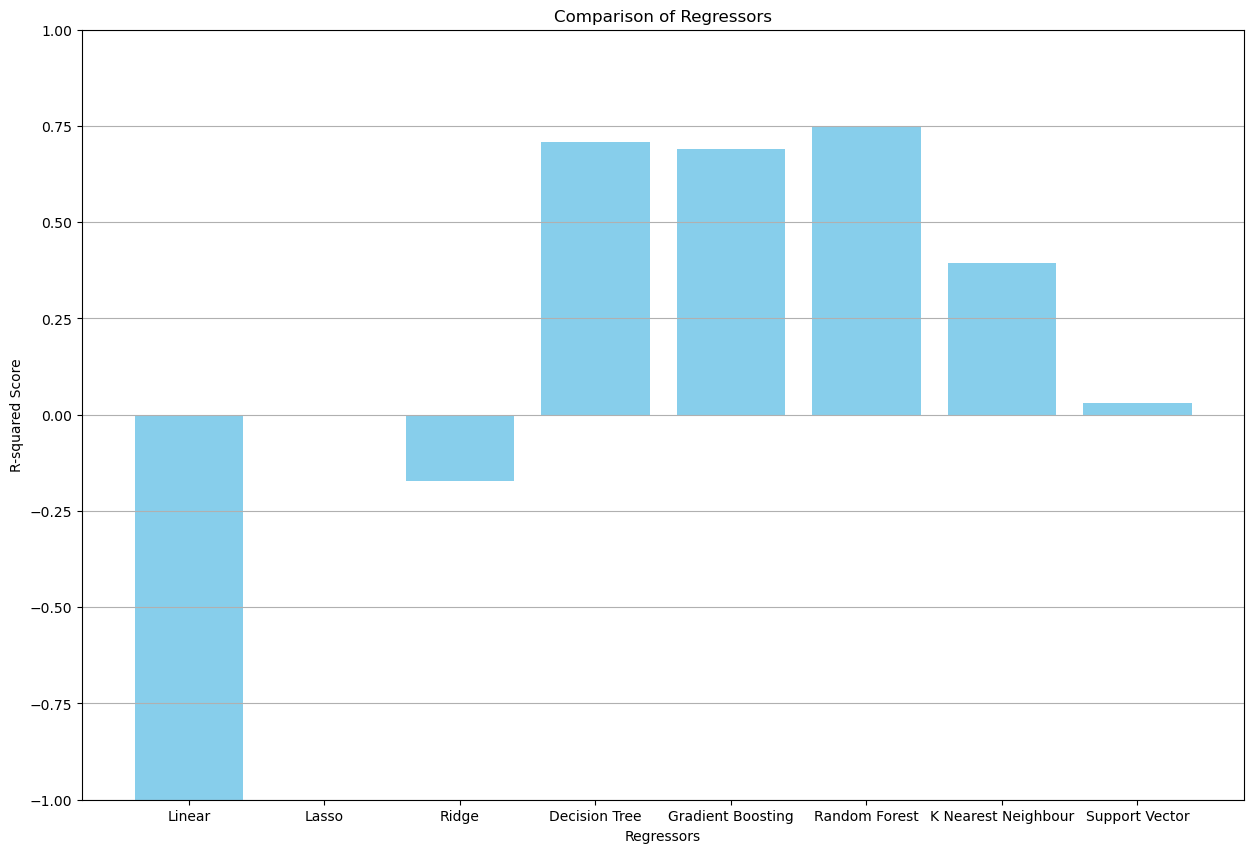

In [66]:
regressors = ['Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'K Nearest Neighbour', 'Support Vector']
scores = [-356, -0.004, -0.172, 0.708, 0.689, 0.751, 0.395, 0.031]  

plt.figure(figsize=(15, 10))
plt.bar(regressors, scores, color='skyblue')
plt.xlabel('Regressors')
plt.ylabel('R-squared Score')
plt.title('Comparison of Regressors')
plt.ylim(-1, 1) 
plt.grid(axis='y')

plt.show()


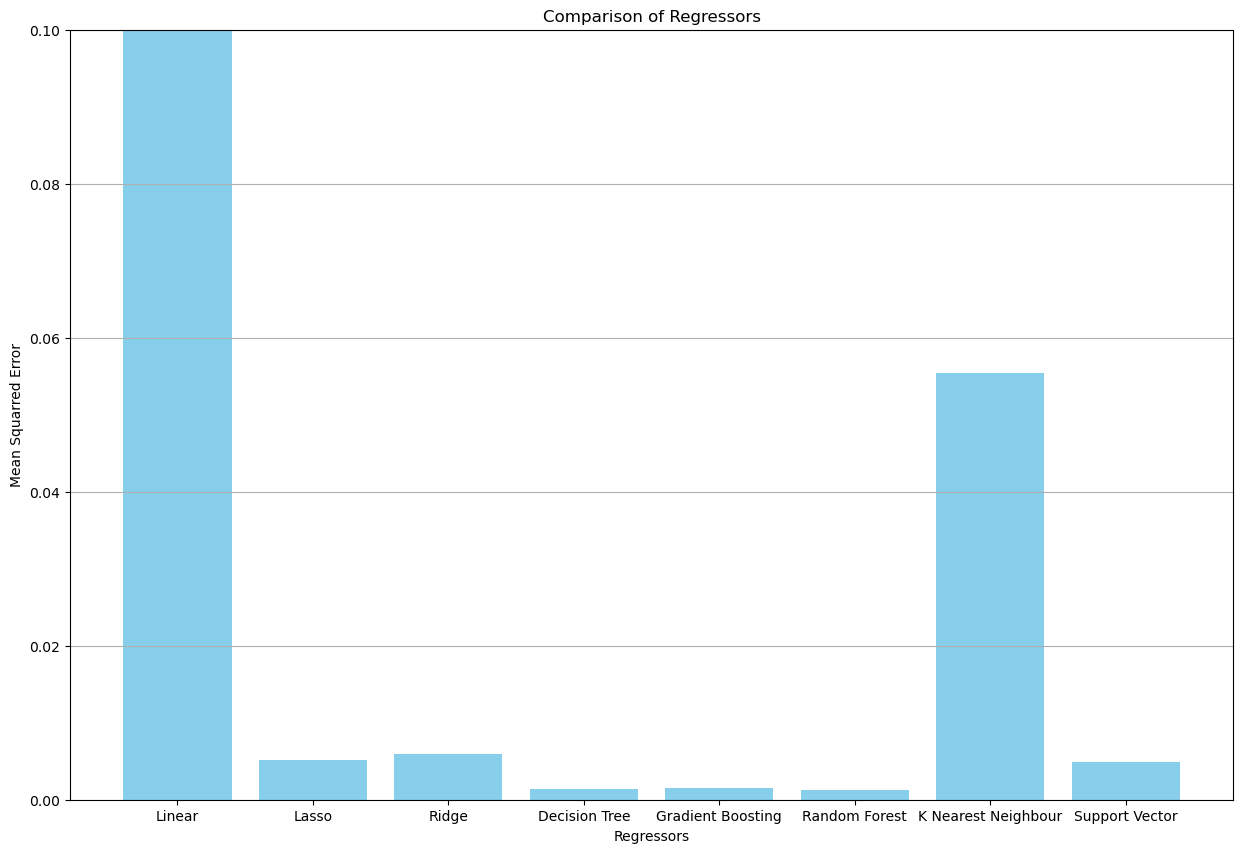

In [72]:
regressors = ['Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'K Nearest Neighbour', 'Support Vector']
mse= [163, 0.0051, 0.0059, 0.0014, 0.0015, 0.0012, 0.0554, 0.0049]  

plt.figure(figsize=(15, 10))
plt.bar(regressors, mse, color='skyblue')
plt.xlabel('Regressors')
plt.ylabel('Mean Squarred Error')
plt.title('Comparison of Regressors')
plt.ylim(0,0.1) 
plt.grid(axis='y')

plt.show()